# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [1]:
import pandas as pd

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [2]:
answer = []
answer1 = []
import os
path = "/"
dir_list = os.listdir(path) 
  
print("Files and directories in '", dir_list, "' :")  #i used this to find my directory and how to list it.
  
cms = os.listdir('/home/jupyter-puryeara/hds5210-2020/week14/cms/')
cms = sorted(cms)
cms = cms[1:]
cms

Files and directories in ' ['initrd.img.old', 'boot', 'sbin', 'usr', 'tmp', 'data', 'media', 'lib64', 'lost+found', 'proc', 'sys', 'vmlinuz', 'root', 'dev', 'snap', 'mnt', 'var', 'lib', 'etc', 'opt', 'vmlinuz.old', 'bin', 'run', 'srv', 'initrd.img', 'home'] ' :


['cms2014.csv', 'cms2015.csv', 'cms2016.csv']

In [3]:
c=1
for c in cms:
    df = pd.read_csv('/home/jupyter-puryeara/hds5210-2020/week14/cms/'+c)
    df.columns = map(str.lower, df.columns)
    answer1.append(df)

answer = pd.concat(answer1, keys=cms)

answer = answer.reset_index()                            #reset the index
display(answer.head())                                   #reviewed the data
answer = answer.rename(columns = {'level_0' : 'year'})   #renamed the first column
answer = answer.drop(['level_1'], axis = 1)              #removed the colum level 1
display(answer.head())


,level_0,level_1,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
0,cms2014.csv,0,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,cms2014.csv,1,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,cms2014.csv,2,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,cms2014.csv,3,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,cms2014.csv,4,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718


,year,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
0,cms2014.csv,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,cms2014.csv,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,cms2014.csv,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,cms2014.csv,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,cms2014.csv,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718


In [4]:
answer = answer.replace(regex={r'cms2014.csv': int(2014), 'cms2015.csv': int(2015), 'cms2016.csv': int(2016)}) #ussed regex to remove the cms and .csv and place the year
answer['year'] = answer['year'].astype(int)                                                                    #made year and int 
display(answer)                                                                                                #reviewe the list
answer.columns                                                                                                 #reviewed the list of column headers

### SOLUTION



,year,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score
0,2014,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
1,2014,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,...,NaN,39.0,64.0,75.0,32.0,NaN,68.0,NaN,NaN,1.1912
2,2014,21,1003001322,Mass Immunization Roster Biller,Y,7,788.0,370,21640.24,21634.91,...,13.0,18.0,42.0,49.0,24.0,5.0,25.0,NaN,3.0,0.8019
3,2014,37,1003002486,Chiropractic,Y,2,142.0,22,7458.44,5037.51,...,NaN,NaN,59.0,59.0,NaN,0.0,64.0,0.0,0.0,0.7920
4,2014,73,1003005430,Clinical Psychologist,Y,3,130.0,11,20640.00,14968.22,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.9718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193857,2016,1053890,1992995542,Ophthalmology,Y,49,2623.0,611,845229.00,354741.85,...,11.0,58.0,54.0,75.0,38.0,7.0,48.0,NaN,7.0,1.8015
193858,2016,1053892,1992995591,Obstetrics & Gynecology,Y,18,27.0,17,9800.23,2929.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.4364
193859,2016,1053900,1992996219,Neurology,Y,25,1121.0,620,565393.00,163926.41,...,46.0,36.0,54.0,68.0,45.0,5.0,40.0,12.0,31.0,2.3548
193860,2016,1053901,1992996284,Internal Medicine,Y,21,4501.6,381,194576.60,163050.75,...,34.0,57.0,64.0,75.0,62.0,12.0,75.0,9.0,12.0,2.4551


Index(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_coun

In [5]:
cms = answer #stored the answer in CMS for the next component

In [6]:
assert(answer.shape == (193862, 60))
#assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [7]:
answer = None
npidata = pd.read_csv('/data/npidata.csv')

display(cms.columns)                          #displayed all the columns

npidata = npidata.rename(columns={'NPI': 'npi'}) #made changed NPI to npi so both of the datasets would have the same format
display(npidata.columns)
### SOLUTION



/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_coun

Index(['row', 'npi', 'Entity Type Code', 'Replacement NPI',
       'Employer Identification Number (EIN)',
       'Provider Organization Name (Legal Business Name)',
       'Provider Last Name (Legal Name)', 'Provider First Name',
       'Provider Middle Name', 'Provider Name Prefix Text',
       'Provider Name Suffix Text', 'Provider Credential Text',
       'Provider Other Organization Name',
       'Provider Other Organization Name Type Code',
       'Provider Other Last Name', 'Provider Other First Name',
       'Provider Other Middle Name', 'Provider Other Name Prefix Text',
       'Provider Other Name Suffix Text', 'Provider Other Credential Text',
       'Provider Other Last Name Type Code',
       'Provider First Line Business Mailing Address',
       'Provider Second Line Business Mailing Address',
       'Provider Business Mailing Address City Name',
       'Provider Business Mailing Address State Name',
       'Provider Business Mailing Address Postal Code',
       'Provider

In [8]:
answer = cms.merge(npidata, how='outer', left_on ='npi', right_on = 'npi') #meged the datasets
answer = answer.dropna(subset=['year']).reset_index()                      #droped al the NAN in the year column
answer['year'] = answer['year'].astype(int)                                #made column int
display(answer.shape)
answer.groupby('Provider Business Mailing Address State Name').npi.count() #grouped by provider column and counted the number of unique NPIs lised
new_answer = answer                                                        #stored the answer in new_answer for next question


(193862, 103)

In [9]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').npi.count()) == [111520, 53366, 4805])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [10]:
answer = None
new_answer['State'] = new_answer['Provider Business Mailing Address State Name'].fillna('XX') #fill the state column cells with na with xx
answer = new_answer                                                                          #placed new_anser in to the answer for the problem
display(answer['State'].unique())
### SOLUTION


array(['IL', 'MO', 'XX', 'WY'], dtype=object)

In [11]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [12]:
%matplotlib inline
answer = None

answer = new_answer.groupby(['year', 'State'])['total_services'].sum().reset_index() #stored answer in answer 
display(answer)
answer = answer.pivot(index='State', columns='year', values='total_services')        #pivoted with index state
answer[2016].sum()                                                                   #sum of the total services column

### SOLUTION


,year,State,total_services
0,2014,IL,101393758.4
1,2014,MO,48577227.1
2,2014,WY,3487240.6
3,2014,XX,14938636.4
4,2015,IL,103048716.3
5,2015,MO,50808468.0
6,2015,WY,3800978.9
7,2015,XX,16533705.2
8,2016,IL,105432032.4
9,2016,MO,50854632.1


176596933.8

In [13]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.6999999)
assert(answer[2016].sum() == 176596933.8)
assert(answer.loc['WY'].sum() == 10892707.4)

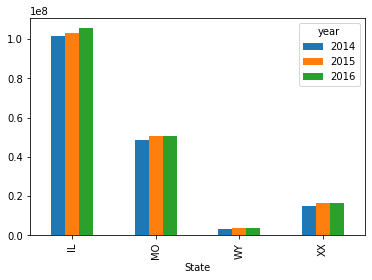

In [14]:
%matplotlib inline
answer.plot.bar()